![anatomy](figs/anatomy.png)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'2.0.0'

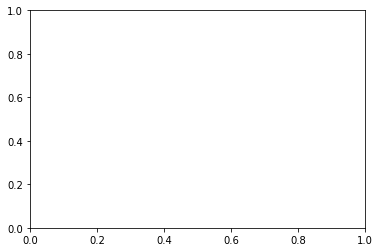

In [2]:
fig1, ax = plt.subplots()

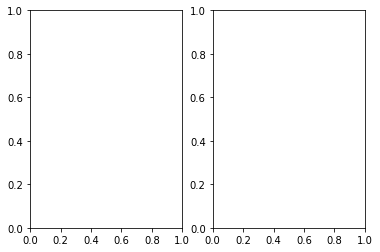

In [3]:
fig2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

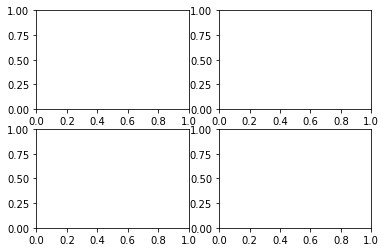

In [4]:
fig2, axes = plt.subplots(nrows=2, ncols=2)

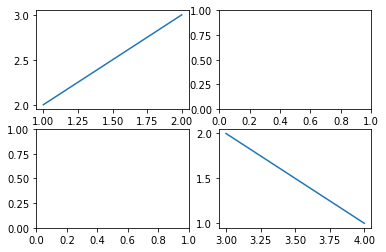

In [5]:
fig2, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].plot([1,2],[2,3])
axes[1,1].plot([3,4], [2,1])

In [6]:
ls data

NEH_Evaluators.csv     NEH_Grants1980s.csv    NEH_StateCouncils.csv
NEH_Grants.csv         NEH_Grants1990s.csv    gc.csv
NEH_Grants1960s.csv    NEH_Grants2000s.csv
NEH_Grants1970s.csv    NEH_Grants2010s.csv


In [7]:
import pandas as pd
pd.__version__

'0.19.2'

In [8]:
df = pd.read_csv("data/NEH_Grants.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63734 entries, 0 to 63733
Data columns (total 32 columns):
Unnamed: 0           63734 non-null int64
AppNumber            63734 non-null object
ApplicantType        63734 non-null object
ApprovedMatching     63734 non-null float64
ApprovedOutright     63734 non-null float64
AwardMatching        63734 non-null float64
AwardOutright        63734 non-null float64
BeginGrant           63734 non-null object
CouncilDate          63734 non-null object
Discipline           63662 non-null object
DisciplineCount      63734 non-null int64
Division             63734 non-null object
EndGrant             63734 non-null object
InstCity             63734 non-null object
InstCountry          63734 non-null object
InstPostalCode       63734 non-null object
InstState            63734 non-null object
Institution          63734 non-null object
OrganizationType     63734 non-null object
OriginalAmount       63734 non-null float64
Participant          60685 n

In [10]:
#lets see what data is suited to what graph
# object so we only get string data 
df.describe(include=['object'])

,AppNumber,ApplicantType,BeginGrant,CouncilDate,Discipline,Division,EndGrant,InstCity,InstCountry,InstPostalCode,InstState,Institution,OrganizationType,Participant,PrimaryDiscipline,Program,ProjectDesc,ProjectTitle,Supplement,ToSupport
count,63734,63734,63734,63734,63662,63734,63734,63734,63734,63734,63734,63734,63734,60685,63734,63734,63733,63734,1291,63734
unique,63192,2,1114,207,3498,11,1207,3321,34,10123,61,8458,43,59785,160,215,13809,53698,1252,24859
top,SO-253355-17,O,1987-02-01T00:00:00,1978-08-01,"{'Name': 'Interdisciplinary Studies, General'}",Research Programs,1987-04-30T00:00:00,New York,USA,{},NY,Unaffiliated Independent Scholar,University,"{'Firstname': 'Margaret', 'Lastname': 'Coval',...","Interdisciplinary Studies, General",Summer Stipends,{},State Humanities Program,"{'SupplementDate': '2001-01-17T00:00:00', 'Out...",{}
freq,4,37308,811,2025,7083,27331,825,3840,62681,1173,8472,2185,18675,61,10609,8180,49601,883,14,37632


In [11]:
# only 2 applicant types, so perfect for pie chart
#I = individual, O = organization

at_freq = df['ApplicantType'].value_counts()
at_freq

O    37308
I    26426
Name: ApplicantType, dtype: int64

/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


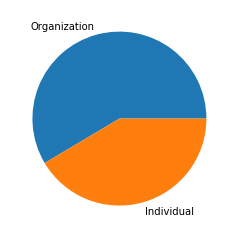

In [12]:
fig, ax = plt.subplots()
ax.pie(at_freq, labels=['Organization', 'Individual'])
ax.set_aspect('equal')
fig.show()

In [13]:
ax.pie?

In [14]:
# bar graph?
freq = df['Division'].value_counts()
freq

Research Programs                    27331
Public Programs                      10485
Education Programs                   10041
Preservation and Access               5965
Fellowships and Seminars              5452
Federal/State Partnership             1878
Challenge Grants                      1727
Digital Humanities                     464
Miscellaneous Humanities Projects      382
Research/Education                       5
Agency-wide Projects                     4
Name: Division, dtype: int64

In [15]:
list(range(-1, freq.shape[0], 2))

[-1, 1, 3, 5, 7, 9]

/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


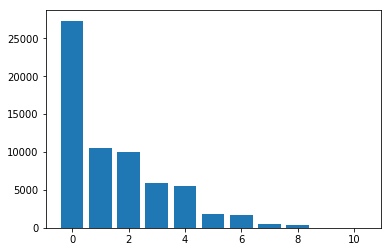

In [16]:
fig, ax = plt.subplots()

index = range(0, freq.shape[0])
ax.bar(index, freq)
fig.show()

/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


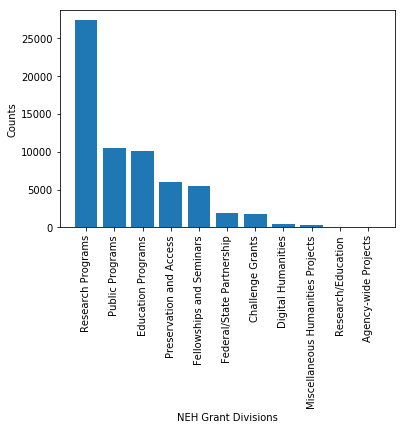

In [17]:
fig, ax = plt.subplots()

index = range(0, freq.shape[0])
ax.bar(index, freq)

ax.set_xticks(index)
ax.set_xticklabels(freq.keys(), rotation=90)

ax.set_xlabel("NEH Grant Divisions")
ax.set_ylabel("Counts")
fig.show()

/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


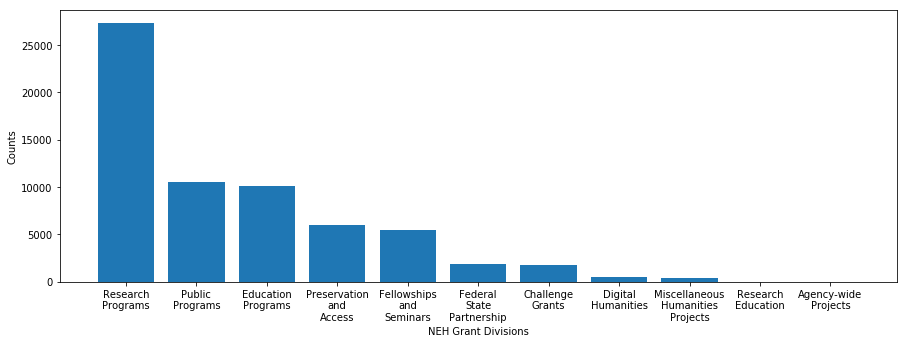

In [18]:
import matplotlib.ticker as mticker


def major_formatter(x, pos):
    """x is the index position"""
    label = freq.keys()[x]
    label = label.replace(" ", "\n")
    label = label.replace("/", "\n")
    return label

fig, ax = plt.subplots(figsize=(15,5))

index = range(0, freq.shape[0])
ax.bar(index, freq)
ax.set_xticks(index)
ax.set_ylabel("Counts")
ax.set_xlabel("NEH Grant Divisions")
ax.xaxis.set_major_formatter(mticker.FuncFormatter(major_formatter))
fig.show()

In [19]:
# what about quantative oriented plots?
df.describe()

,Unnamed: 0,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,DisciplineCount,OriginalAmount,ParticipantCount,SupplementAmount,SupplementCount,Unnamed: 0.1,YearAwarded
count,63734.000000,6.373400e+04,6.373400e+04,6.373400e+04,6.373400e+04,63734.000000,6.373400e+04,63734.000000,1.291000e+03,63734.000000,63734.000000,63734.000000
mean,31866.500000,1.627890e+04,6.874736e+04,1.515802e+04,6.697797e+04,1.155396,7.341389e+04,0.996831,4.816084e+05,0.030125,7065.272963,1989.500612
std,18398.565365,8.883376e+04,2.054341e+05,8.459079e+04,1.951743e+05,0.460904,1.615286e+05,0.366983,6.532164e+05,0.228998,4922.332543,12.405485
min,0.000000,0.000000e+00,0.000000e+00,-7.794010e+03,-1.041770e+03,0.000000,-2.864249e+06,0.000000,1.090000e+02,0.000000,0.000000,1966.000000
25%,15933.250000,0.000000e+00,3.411500e+03,0.000000e+00,3.000000e+03,1.000000,4.000000e+03,1.000000,1.200000e+04,0.000000,2985.000000,1979.000000
50%,31866.500000,0.000000e+00,1.900150e+04,0.000000e+00,1.800000e+04,1.000000,2.087950e+04,1.000000,2.045760e+05,0.000000,6237.000000,1987.000000
75%,47799.750000,0.000000e+00,5.041525e+04,0.000000e+00,5.040000e+04,1.000000,6.320238e+04,1.000000,8.028000e+05,0.000000,10519.000000,1998.000000
max,63733.000000,6.000000e+06,8.711590e+06,6.000000e+06,6.544450e+06,5.000000,6.000000e+06,9.000000,8.495094e+06,7.000000,19736.000000,2017.000000


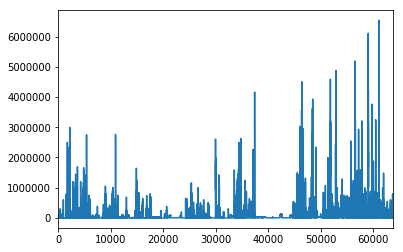

In [20]:
fig, ax = plt.subplots()
df['AwardOutright'].plot(ax=ax)

In [21]:
#time series, yes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63734 entries, 0 to 63733
Data columns (total 32 columns):
Unnamed: 0           63734 non-null int64
AppNumber            63734 non-null object
ApplicantType        63734 non-null object
ApprovedMatching     63734 non-null float64
ApprovedOutright     63734 non-null float64
AwardMatching        63734 non-null float64
AwardOutright        63734 non-null float64
BeginGrant           63734 non-null object
CouncilDate          63734 non-null object
Discipline           63662 non-null object
DisciplineCount      63734 non-null int64
Division             63734 non-null object
EndGrant             63734 non-null object
InstCity             63734 non-null object
InstCountry          63734 non-null object
InstPostalCode       63734 non-null object
InstState            63734 non-null object
Institution          63734 non-null object
OrganizationType     63734 non-null object
OriginalAmount       63734 non-null float64
Participant          60685 n

In [31]:
df[df['BeginGrant'].str.contains("9999-09-01")]

,Unnamed: 0,AppNumber,ApplicantType,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,BeginGrant,CouncilDate,Discipline,...,PrimaryDiscipline,Program,ProjectDesc,ProjectTitle,Supplement,SupplementAmount,SupplementCount,ToSupport,Unnamed: 0.1,YearAwarded
237,237,FB-20271-67,I,0.0,8140.0,0.0,8140.0,9999-09-01T00:00:00,1967-01-12,{'Name': 'British Literature'},...,British Literature,Fellowships for College Teachers and Independe...,{},Title not available,NaN,NaN,0,{},237,1967
689,689,FB-20273-66,I,0.0,8140.0,0.0,8140.0,9999-09-01T00:00:00,1966-09-15,{'Name': 'Classics'},...,Classics,Fellowships for College Teachers and Independe...,{},Title not available,NaN,NaN,0,{},689,1966
690,690,FB-20275-67,I,0.0,8140.0,0.0,8140.0,9999-09-01T00:00:00,1967-01-12,{'Name': 'German Literature'},...,German Literature,Fellowships for College Teachers and Independe...,{},Title not available,NaN,NaN,0,{},690,1967
691,691,FB-20277-67,I,0.0,8140.0,0.0,8140.0,9999-09-01T00:00:00,1967-01-12,"{'Name': 'Philosophy, General'}",...,"Philosophy, General",Fellowships for College Teachers and Independe...,{},Title not available,NaN,NaN,0,{},691,1967


In [36]:
#lets sort on date first
ds = df.sort( columns=["CouncilDate"])


/Users/hannah/anaconda/envs/neh/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


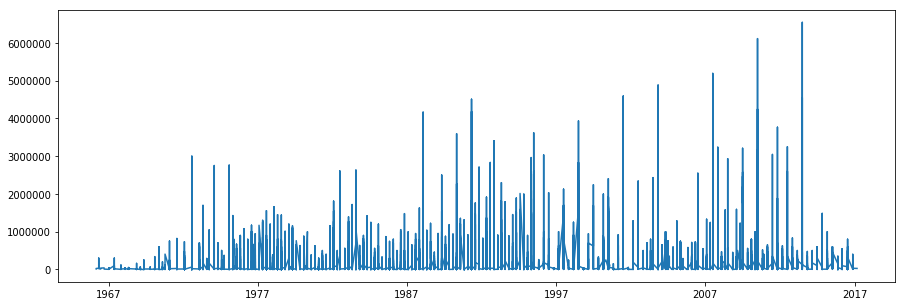

In [37]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(ds['CouncilDate'], ds['AwardOutright'], '-')

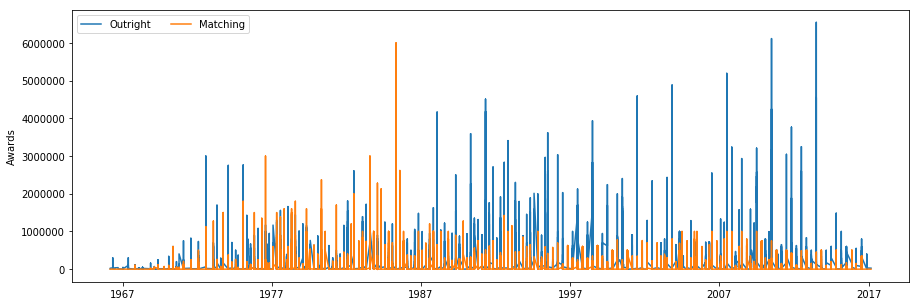

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(ds['CouncilDate'], ds['AwardOutright'], '-', label="Outright")
ax.plot_date(ds['CouncilDate'], ds['AwardMatching'], '-', label="Matching")
ax.legend(ncol=2)
ax.set_ylabel("Awards")

In [43]:
#lets add inflation
import datetime
from pandas_datareader import data as pddata

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2016,3, 27)

cpium=pddata.DataReader("CPIAUCSL", "fred", start, end)

inflation = cpium/cpium.ix['2016-03-01']
monthly = inflation.index.strftime("%Y-%m")
monthly_inflation = inflation.reindex(monthly)
ds['date'] = ds['CouncilDate'].str.rpartition("-")[0]
ds['inflation'] = monthly_inflation.loc[ds['date']]['CPIAUCSL'].values

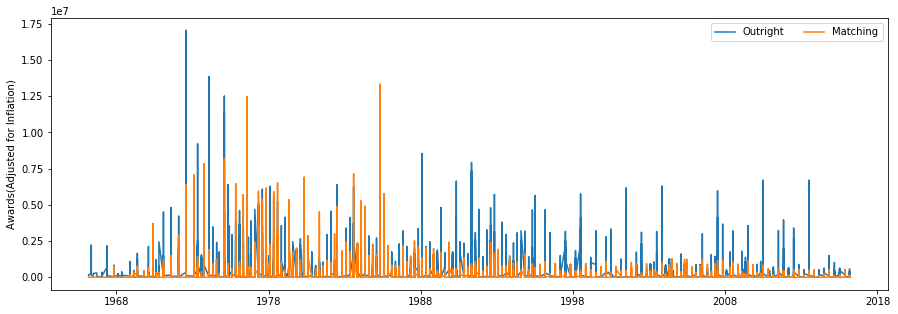

In [46]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(ds['CouncilDate'], ds['AwardOutright']/ds['inflation'], '-', label="Outright")
ax.plot_date(ds['CouncilDate'], ds['AwardMatching']/ds['inflation'], '-', label="Matching")
ax.legend(ncol=2)
ax.set_ylabel("Awards(Adjusted for Inflation)")

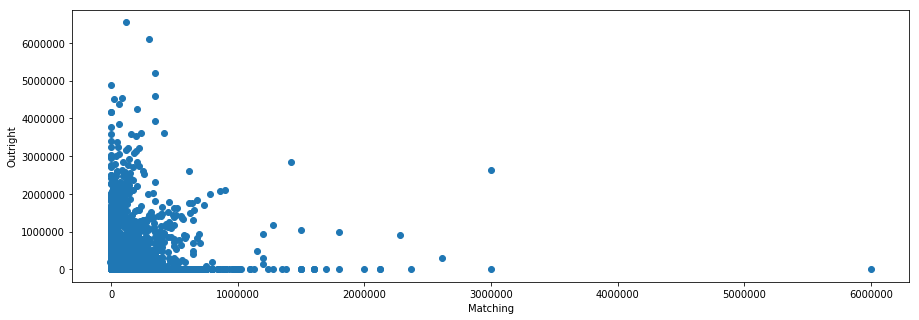

In [56]:
# compare the two?
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(ds['AwardMatching'], ds['AwardOutright'])
ax.set_xlabel("Matching")
ax.set_ylabel("Outright")

In [57]:
ds[["AwardMatching", "AwardOutright"]].corr()

,AwardMatching,AwardOutright
AwardMatching,1.00000,0.12504
AwardOutright,0.12504,1.00000


In [49]:
#search for 
funds = ds[["BeginGrant","ApprovedOutright", "ApprovedMatching"]]
funds[(funds['ApprovedOutright']>500) & (funds['ApprovedMatching']<1000)]

,BeginGrant,ApprovedOutright,ApprovedMatching
47,1966-06-01T00:00:00,14000.0,0.0
1002,1966-06-01T00:00:00,24088.0,0.0
585,1966-07-01T00:00:00,32500.0,0.0
414,1966-08-01T00:00:00,300000.0,0.0
553,1966-07-01T00:00:00,20000.0,0.0
873,1967-07-01T00:00:00,10000.0,0.0
889,1966-08-01T00:00:00,34950.0,0.0
431,1966-10-01T00:00:00,40000.0,0.0
434,1966-09-01T00:00:00,20600.0,0.0
689,9999-09-01T00:00:00,8140.0,0.0


In [58]:
ds['TotalAwardAdj'] = (ds['AwardMatching'] + ds['AwardOutright'])/ds['inflation']

In [61]:
# what about more complicated relationships?

apdiv = ds.groupby(["InstCountry", "Division"]).sum()
apdiv.head()

,,Unnamed: 0,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,DisciplineCount,OriginalAmount,ParticipantCount,SupplementAmount,SupplementCount,Unnamed: 0.1,YearAwarded,inflation,TotalAwardAdj
InstCountry,Division,,,,,,,,,,,,,,
Argentina,Research Programs,47062,0.0,86500.0,0.0,86500.0,1,86500.0,1,NaN,0,11210,1995,0.638866,135396.101249
Australia,Research Programs,159362,0.0,79500.0,0.0,79500.0,5,79500.0,4,NaN,0,24502,9948,2.531523,132256.622407
Austria,Education Programs,11196,0.0,105789.0,0.0,105789.0,1,105789.0,1,NaN,0,10190,1976,0.234797,450555.161753
Bosnia and Herzegovina,Research Programs,54890,0.0,5000.0,0.0,5000.0,1,5000.0,1,NaN,0,6392,2006,0.837541,5969.859579
Brazil,Research Programs,54187,0.0,40000.0,0.0,40000.0,1,40000.0,1,NaN,0,5689,2005,0.808139,49496.465696


In [66]:
mat = apdiv['TotalAwardAdj'].unstack()
mat

Division,Agency-wide Projects,Challenge Grants,Digital Humanities,Education Programs,Federal/State Partnership,Fellowships and Seminars,Miscellaneous Humanities Projects,Preservation and Access,Public Programs,Research Programs,Research/Education
InstCountry,,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.353961e+05,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.322566e+05,NaN
Austria,NaN,NaN,NaN,4.505552e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.969860e+03,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.949647e+04,NaN
CANADA,NaN,NaN,NaN,NaN,NaN,1.519647e+03,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,7.470432e+04,NaN,3.850647e+06,NaN,2.240393e+06,NaN
China,NaN,NaN,NaN,NaN,NaN,1.443480e+03,NaN,NaN,NaN,1.591266e+05,NaN
Cyprus,NaN,4.436687e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.232182e+05,NaN


In [67]:
countries = mat.index.values
divisions = mat.keys()
countries, divisions

(array(['Argentina', 'Australia', 'Austria', 'Bosnia and Herzegovina',
        'Brazil', 'CANADA', 'Canada', 'China', 'Cyprus', 'Czech Republic',
        'Denmark', 'Egypt', 'England', 'Finland', 'France', 'Germany',
        'Greece', 'Hungary', 'India', 'Israel', 'Italy', 'Lebanon',
        'Netherlands', 'New Zealand', 'Norway', 'Poland', 'South Africa',
        'Spain', 'Switzerland', 'Thailand', 'USA', 'United Kingdom',
        'West Africa', '{}'], dtype=object),
 Index(['Agency-wide Projects', 'Challenge Grants', 'Digital Humanities',
        'Education Programs', 'Federal/State Partnership',
        'Fellowships and Seminars', 'Miscellaneous Humanities Projects',
        'Preservation and Access', 'Public Programs', 'Research Programs',
        'Research/Education'],
       dtype='object', name='Division'))

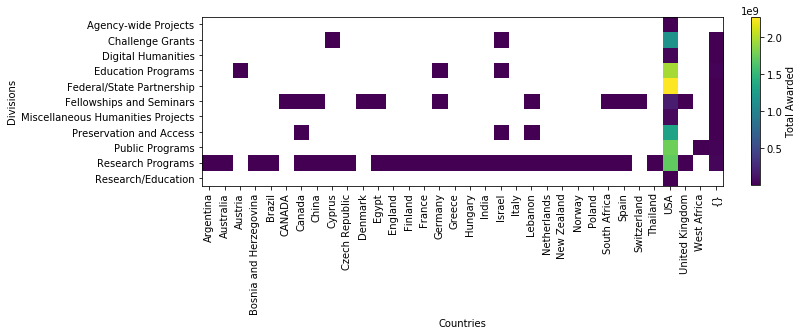

In [75]:
fig, ax = plt.subplots(figsize=(10,10))

sm = ax.imshow(mat.values.T)

ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation=90)
ax.set_xlabel("Countries")

ax.set_yticks(range(len(divisions)))
ax.set_yticklabels(divisions, rotation=0)
ax.set_ylabel("Divisions")

cb = fig.colorbar(sm, fraction=.015)
cb.set_label("Total Awarded")

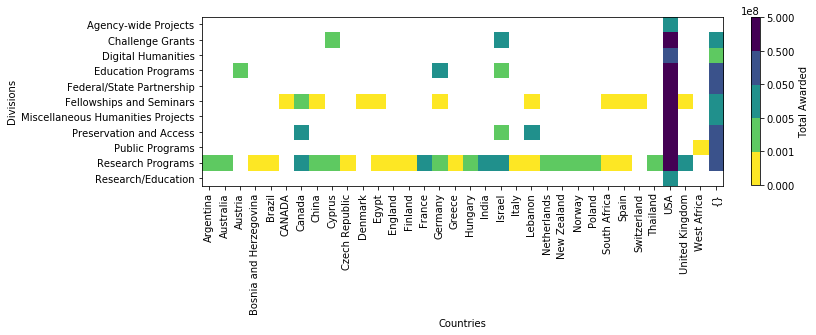

In [77]:
import matplotlib.colors as mcolors

cmap = mcm.viridis_r
bounds = [5e3, 5e4, 5e5, 5e6, 5e7, 5e8]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(10,10))

sm = ax.imshow(mat.values.T, cmap=cmap, norm=norm)

ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation=90)
ax.set_xlabel("Countries")

ax.set_yticks(range(len(divisions)))
ax.set_yticklabels(divisions, rotation=0)
ax.set_ylabel("Divisions")

cb = fig.colorbar(sm, fraction=.015)
cb.set_label("Total Awarded")

In [78]:
df[df['Division'].str.contains("Challenge Grants")][['Institution', 'ProjectTitle', 'ProjectDesc',]]

,Institution,ProjectTitle,ProjectDesc
1008,Aspen Institute for Humanistic Studies,Challenge Grant,{}
1009,Bicentennial Council of the 13 Original States,Challenge Grant,{}
1010,Yazoo Library Association,Challenge Grant,{}
1011,Altoona Area Public Library,Challenge Grant,{}
1012,Carnegie Library of Pittsburgh,Challenge Grant,{}
1013,"Japan Society, Inc.",Challenge Grang,{}
1014,Chautauqua Institution,Challenge Grant,{}
1015,Providence Public Library,Challenge Grant,{}
1016,Cambria County Library Association,Challenge Grant,{}
1017,"Duquesne University Tamburitzans, Inc.",Challenge Grant,{}


In [79]:
df.keys()

Index(['Unnamed: 0', 'AppNumber', 'ApplicantType', 'ApprovedMatching',
       'ApprovedOutright', 'AwardMatching', 'AwardOutright', 'BeginGrant',
       'CouncilDate', 'Discipline', 'DisciplineCount', 'Division', 'EndGrant',
       'InstCity', 'InstCountry', 'InstPostalCode', 'InstState', 'Institution',
       'OrganizationType', 'OriginalAmount', 'Participant', 'ParticipantCount',
       'PrimaryDiscipline', 'Program', 'ProjectDesc', 'ProjectTitle',
       'Supplement', 'SupplementAmount', 'SupplementCount', 'ToSupport',
       'Unnamed: 0.1', 'YearAwarded'],
      dtype='object')

In [91]:
mat = ds.groupby(["OrganizationType", "Division"])['TotalAwardAdj'].sum().unstack()
mat

Division,Agency-wide Projects,Challenge Grants,Digital Humanities,Education Programs,Federal/State Partnership,Fellowships and Seminars,Miscellaneous Humanities Projects,Preservation and Access,Public Programs,Research Programs,Research/Education
OrganizationType,,,,,,,,,,,
Academic Library,NaN,1.858774e+03,NaN,NaN,NaN,NaN,NaN,4.021021e+06,2.387944e+03,NaN,NaN
Anthropology/Archaeology Museum,NaN,NaN,NaN,2.310367e+05,NaN,NaN,NaN,3.126520e+04,6.333179e+05,1.410840e+04,NaN
Archives,NaN,4.947589e+04,NaN,NaN,NaN,NaN,NaN,1.773166e+06,1.732233e+06,5.890440e+04,NaN
Art Museum,NaN,5.133121e+07,2.640675e+04,2.800411e+06,NaN,NaN,NaN,2.033411e+07,8.573551e+07,1.298425e+06,NaN
Arts Related Organizations,NaN,2.510934e+06,2.665294e+05,1.529842e+07,NaN,1.617190e+05,5.723830e+05,8.424059e+06,5.225494e+07,3.971515e+06,NaN
Center For Advanced Study/Research Institute,NaN,3.903060e+07,2.088437e+06,6.028337e+07,1.624095e+06,1.074514e+07,6.026586e+05,4.030585e+07,2.071244e+07,8.565199e+07,NaN
Community-Level Organization,NaN,1.529231e+06,2.668350e+04,1.651692e+06,2.744081e+05,NaN,5.394330e+05,3.086393e+06,1.535501e+07,1.096285e+06,NaN
Educational Consortium,NaN,2.079255e+06,NaN,1.183490e+07,NaN,6.038210e+04,1.247096e+06,2.971242e+06,5.410422e+06,2.712268e+06,NaN
Elementary/Middle School,NaN,NaN,NaN,1.849735e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
programs = mat.index.values
divisions = mat.keys()
print(divisions, programs)

Index(['Agency-wide Projects', 'Challenge Grants', 'Digital Humanities',
       'Education Programs', 'Federal/State Partnership',
       'Fellowships and Seminars', 'Miscellaneous Humanities Projects',
       'Preservation and Access', 'Public Programs', 'Research Programs',
       'Research/Education'],
      dtype='object', name='Division') ['Academic Library' 'Anthropology/Archaeology Museum' 'Archives'
 'Art Museum' 'Arts Related Organizations'
 'Center For Advanced Study/Research Institute'
 'Community-Level Organization' 'Educational Consortium'
 'Elementary/Middle School' 'Four-Year College' 'General Museum'
 'Historic Preservation Organization' 'Historical Site/House'
 'Historical Society' 'History Museum' 'Independent Production Company'
 'Independent Research Library' 'Indian Tribal Organization' 'Individual'
 'Libraries' 'Museums' 'National Organization' 'Natural History Museum'
 'Nature Center/Botanical Garden/Aboretum' 'Non-Profit Educational Center'
 'Philanthropic Found

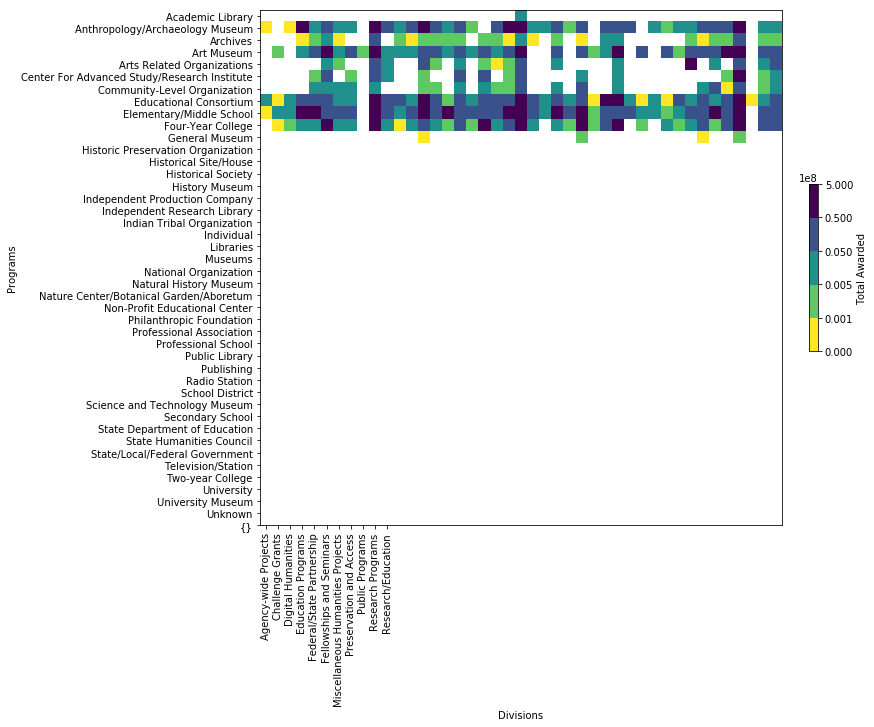

In [99]:
import matplotlib.colors as mcolors

cmap = mcm.viridis_r
bounds = [5e3, 5e4, 5e5, 5e6, 5e7, 5e8]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(10,10))

sm = ax.imshow(mat.values.T, cmap=cmap, norm=norm)

ax.set_yticks(range(len(programs)))
ax.set_yticklabels(programs, rotation=0)
ax.set_ylabel("Programs")

ax.set_xticks(range(len(divisions)))
ax.set_xticklabels(divisions, rotation=90)
ax.set_xlabel("Divisions")

cb = fig.colorbar(sm, fraction=.015)
cb.set_label("Total Awarded")